In [15]:
geolocator = Nominatim(user_agent="geocoder_app")

def geocode_university(university_name):
    try:
        location = geolocator.geocode(university_name, timeout=10)
        if location:
            return location.latitude, location.longitude, location.address
        else:
            return None, None, None
    except GeocoderTimedOut:
        print(f"Geocoding timed out for: {university_name}")
        return None, None, None
    except Exception as e:
        print(f"Error geocoding {university_name}: {e}")
        return None, None, None


total_institutions = len(df)
geocoded_count = 0

def geocode_university_with_progress(university_name):
    global geocoded_count
    geocoded_count += 1
    if geocoded_count % 50 == 0 or geocoded_count == total_institutions:
        print(f"Geocoded {geocoded_count}/{total_institutions} institutions...")
    return geocode_university(university_name)


df['Latitude'], df['Longitude'], df['Address'] = zip(*df['PHD'].apply(geocode_university_with_progress))

print("Geocoding complete. Added 'Latitude', 'Longitude', and 'Address' columns to the DataFrame.")
display(df.head())

Geocoded 50/884 institutions...
Geocoded 100/884 institutions...
Geocoded 150/884 institutions...
Geocoded 200/884 institutions...
Geocoded 250/884 institutions...
Geocoded 300/884 institutions...
Geocoded 350/884 institutions...
Geocoded 400/884 institutions...
Geocoded 450/884 institutions...
Geocoded 500/884 institutions...
Geocoded 550/884 institutions...
Geocoded 600/884 institutions...
Geocoded 650/884 institutions...
Geocoded 700/884 institutions...
Geocoded 750/884 institutions...
Geocoded 800/884 institutions...
Geocoded 850/884 institutions...
Geocoded 884/884 institutions...
Geocoding complete. Added 'Latitude', 'Longitude', and 'Address' columns to the DataFrame.


,PHD,Latitude,Longitude,Address
0,Rensselaer Polytechnic Institute,42.729897,-73.679668,"Rensselaer Polytechnic Institute, 110, 8th Str..."
1,"Jawaharlal Nehru University, New Delhi.",28.551652,77.169333,"Jawaharlal Nehru University Campus, Baba Gang ..."
2,IIT Guwahati,26.192479,91.694636,"Indian Institute of Technology Guwahati, Footp..."
3,"Bose Institute, Kolkata",22.579608,88.373829,"Bose Institute, Acharya Jagadish Chandra Bose ..."
4,IIT Delhi,28.544997,77.189151,"Indian Institute of Technology Delhi, Hauz Kha..."


In [21]:
from google.colab import files
files.download("geocoded_phd_institutions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
df.to_csv('geocoded_phd_institutions.csv', index=False)
print("Geocoded data saved to 'geocoded_phd_institutions.csv'")

def extract_institute_and_country(df, address_col):
    """
    Extracts the Institute Name and Country Name from a complex address column.
    """
    if address_col not in df.columns:
        print(f"Error: Column '{address_col}' not found in DataFrame.")
        return None


    df_clean = df.dropna(subset=[address_col]).copy()

    print(f"Starting extraction on {len(df_clean)} non-missing records...")


    def get_country(address):
        parts = address.split(',')
        if parts:
            last_part = parts[-1].strip()
            return last_part.split()[-1]
        return pd.NA

    df_clean['Country'] = df_clean[address_col].apply(get_country)


    def get_institute(address):
        institute = address.split(',')[0].strip()


        return institute[:50].strip()

    df_clean['Institute_Name'] = df_clean[address_col].apply(get_institute)



    df_clean['Institute_Name'] = df_clean['Institute_Name'].str.replace(r'^\d+\s*\S*\s*', '', regex=True)
    df_clean['Institute_Name'] = df_clean['Institute_Name'].str.replace('University of ParisSud (11)/INRIA', 'University of Paris-Sud / INRIA', regex=False)

    result_df = df_clean[['Institute_Name', 'Country']].reset_index(drop=True)
    return result_df

if __name__ == "__main__":



    ADDRESS_COLUMN = 'Address'

    if df is not None:
        extracted_df = extract_institute_and_country(df, ADDRESS_COLUMN)

        if extracted_df is not None:
            print("\n" + "="*50)
            print("Extracted Institute and Country Data (Top 20)")
            print("="*50)
            print(extracted_df.head(20).to_string(index=False))

            # Save the clean data
            extracted_df.to_csv('cleaned_institute_country.csv', index=False)
            print("\n✓ Saved extracted data to 'cleaned_institute_country.csv'")

Geocoded data saved to 'geocoded_phd_institutions.csv'
Starting extraction on 709 non-missing records...

Extracted Institute and Country Data (Top 20)
                          Institute_Name Country
        Rensselaer Polytechnic Institute America
      Jawaharlal Nehru University Campus   India
 Indian Institute of Technology Guwahati   India
                          Bose Institute   India
    Indian Institute of Technology Delhi   India
                              IIT Madras   India
                     Stanford University America
             Indian Institute of Science   India
                     Πανεπιστήμιο Κρήτης   Ελλάς
                          Bose Institute   India
Indian Institute of Technology Kharagpur   India
                              IIT Madras   India
                              IIT Madras   India
             Indian Institute of Science   India
                Banaras Hindu University   India
   Indian Institute of Technology Bombay   India
               

In [26]:
from google.colab import files
files.download("cleaned_institute_country.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Clean data loaded successfully. Total rows: 693

ANALYSIS: PhD Source Countries and Institutions

🌍 Top 10 Countries for Faculty PhDs:
Country
India          475
America        145
Kingdom         18
Deutschland     14
Canada          12
Singapore        6
France           4
Nederland        4
Australia        4
Aotearoa         2

🏛️ Top 15 PhD Institutions (Raw Count):
Institute_Name
Indian Institute of Science                           96
IIT Kanpur                                            50
Indian Institute of Technology Bombay                 48
IIT Madras                                            36
Indian Institute of Technology Kharagpur              31
Indian Institute of Technology Delhi                  28
Tata Institute of Fundamental Research                22
Jawaharlal Nehru Centre for Advanced Scientific Re    13
Indian Institute of Technology Guwahati               12
University of Hyderabad                               12
University of Delhi                      

/tmp/ipython-input-529168174.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette="Blues_d", ax=axes[0])
/tmp/ipython-input-529168174.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=institute_counts.values, y=institute_counts.index, palette="Reds_d", ax=axes[1])



✓ Saved visualizations to 'source_analysis_charts_clean.png'


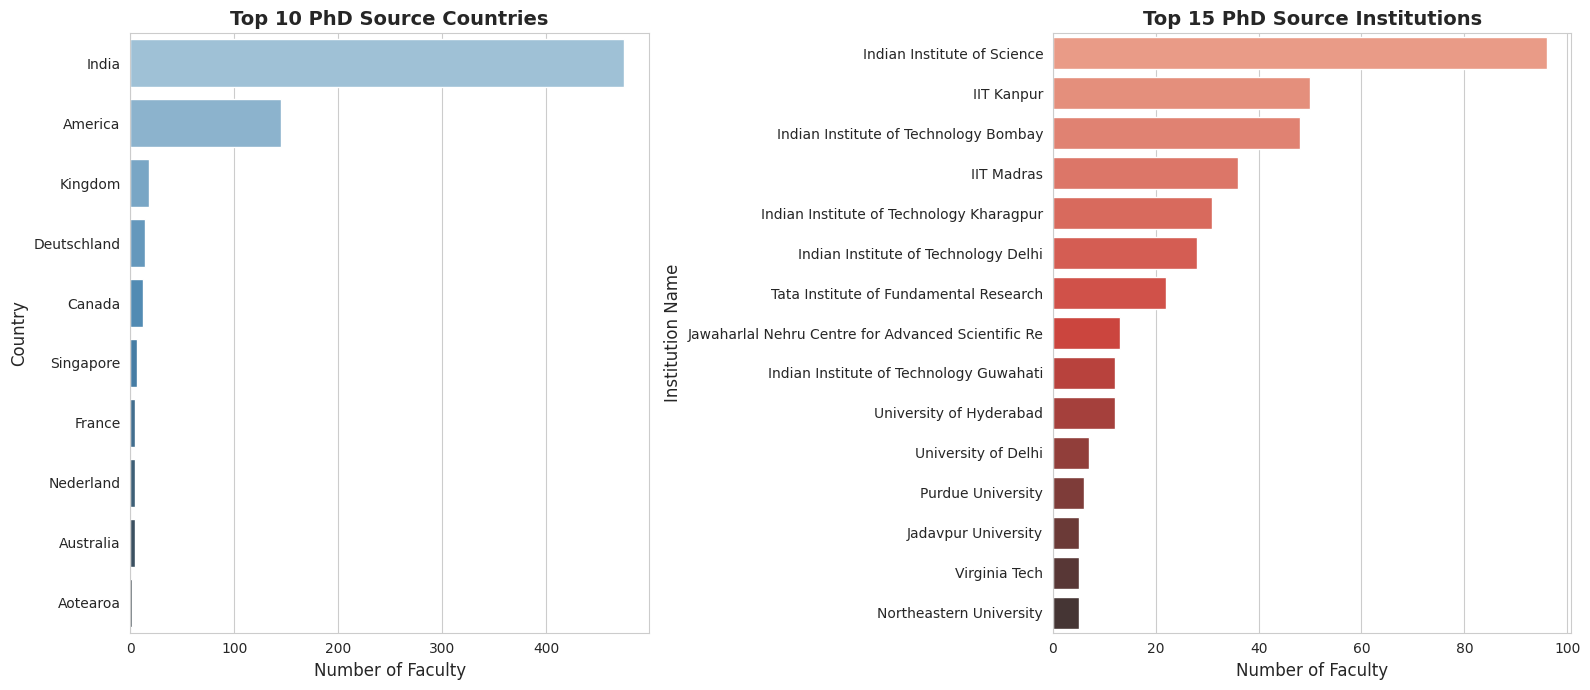

In [31]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

CLEAN_DATA_FILE =  "/content/drive/MyDrive/Colab Notebooks/count.csv"


def load_clean_data(path):
    """Safely loads the pre-cleaned CSV data."""
    if not os.path.exists(path):
        print(f"Error: Clean data file not found at {path}")
        print("Please ensure you have run the data extraction script first to create this file.")
        return None
    try:
        df = pd.read_csv(path)
        print(f"Clean data loaded successfully. Total rows: {len(df)}")
        return df
    except Exception as e:
        print(f"Error loading CSV: {e}")
        return None

def visualize_and_analyze(df_extracted):
    """
    Performs basic analysis and visualization on the extracted data.
    (This function is reused from the previous script.)
    """
    if df_extracted is None or df_extracted.empty:
        print("Cannot run analysis: DataFrame is empty or None.")
        return

    sns.set_style("whitegrid")

    df_extracted = df_extracted.dropna(subset=['Institute_Name', 'Country'])

    print("\n" + "="*50)
    print("ANALYSIS: PhD Source Countries and Institutions")
    print("="*50)


    country_counts = df_extracted['Country'].value_counts().head(10)
    print("\n🌍 Top 10 Countries for Faculty PhDs:")
    print(country_counts.to_string())

    institute_counts = df_extracted['Institute_Name'].value_counts().head(15)
    print("\n🏛️ Top 15 PhD Institutions (Raw Count):")
    print(institute_counts.to_string())


    fig, axes = plt.subplots(1, 2, figsize=(16, 7))

    sns.barplot(x=country_counts.values, y=country_counts.index, palette="Blues_d", ax=axes[0])
    axes[0].set_title('Top 10 PhD Source Countries', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Number of Faculty', fontsize=12)
    axes[0].set_ylabel('Country', fontsize=12)

    sns.barplot(x=institute_counts.values, y=institute_counts.index, palette="Reds_d", ax=axes[1])
    axes[1].set_title('Top 15 PhD Source Institutions', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Number of Faculty', fontsize=12)
    axes[1].set_ylabel('Institution Name', fontsize=12)

    plt.tight_layout()
    plt.savefig('source_analysis_charts_clean.png', dpi=300)
    print("\n✓ Saved visualizations to 'source_analysis_charts_clean.png'")


if __name__ == "__main__":

    df_data = load_clean_data(CLEAN_DATA_FILE)

    if df_data is not None:
        visualize_and_analyze(df_data)
